![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 4<center></font> 
## <center>Dr. Fadaei<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>


## Aim

This assignment aims to use the Scikit-Learn python library to build three classifiers, K-Nearest-Neighbors, Decision-Tree, and Random Forests, and optimize the hyperparameters.


The dataset is for some music from Spotify with parameters like the artist name, duration of the song, energy, tempo, etc. We want to predict the genre of the music using this data.

# Phase 0 - Exploratory Data Analysis(EDA)

In [158]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
data = pd.read_csv("dataset.csv")
data

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [6]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [28]:

for column in data.columns:
    print(data[column].isnull().sum()/data.shape[0],"% of the column",column,"is missing.")

0.0498 % of the column artist_name is missing.
0.0 % of the column track_name is missing.
0.0 % of the column popularity is missing.
0.0 % of the column acousticness is missing.
0.0 % of the column danceability is missing.
0.10033333333333333 % of the column duration_ms is missing.
0.0 % of the column energy is missing.
0.0 % of the column instrumentalness is missing.
0.0 % of the column key is missing.
0.0 % of the column liveness is missing.
0.0 % of the column loudness is missing.
0.0 % of the column mode is missing.
0.0 % of the column speechiness is missing.
0.09776666666666667 % of the column tempo is missing.
0.0 % of the column valence is missing.
0.0 % of the column music_genre is missing.


In [44]:
numeric_columns=['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

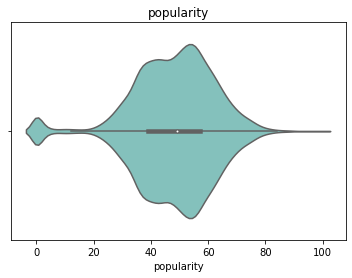

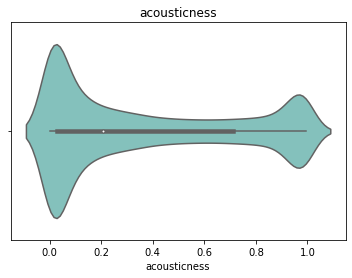

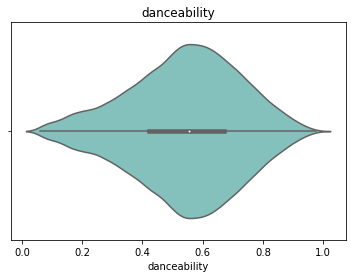

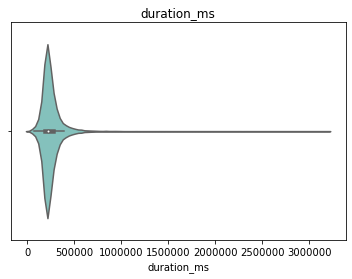

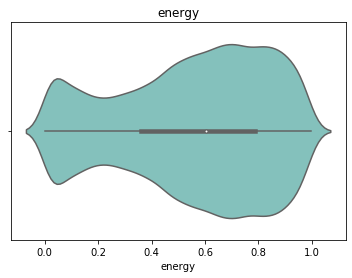

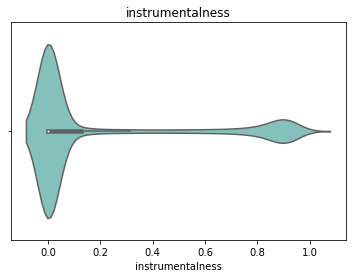

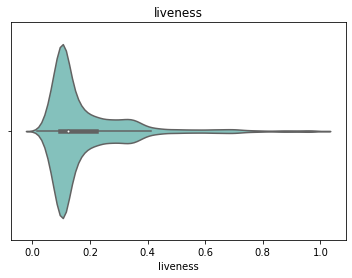

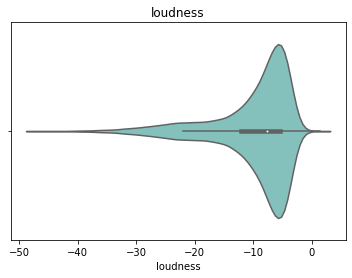

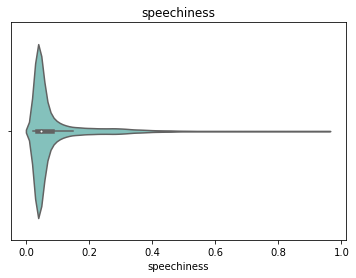

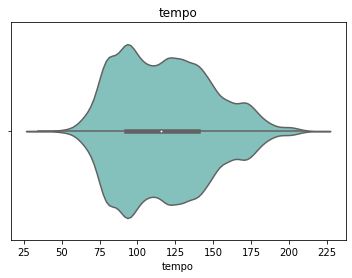

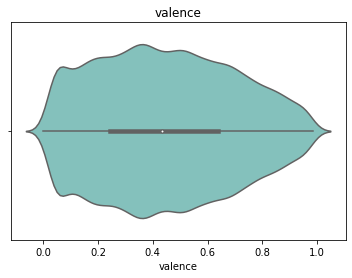

In [45]:
for column in numeric_columns:
    sns.violinplot(x=column,data=data,palette="GnBu") 
    plt.title(column)
    plt.show()


The duration and speechiness follow the normal distribution, and other features don't follow any specific distribution.

# Phase 2 - Preprocessing

## Methods of Handling Missing Values
[Source](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

### Delete Rows with Missing Values
#### Pros:
A model trained to remove all missing values creates a robust model.
#### Cons:
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive compared to the complete dataset.

### Impute missing values with Mean/Median
#### Pros:
Prevent data loss which results in the deletion of rows or columns
It works well with a small dataset and is easy to implement.
#### Cons:
Works only with continuous numerical variables.
Can cause data leakage
Do not factor in the covariance between features.

### Imputation method for categorical columns using the mode
#### Pros:
Prevent data loss which results in the deletion of rows or columns
It works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category
#### Cons:
Works only with categorical variables.
The addition of new features to the model while encoding may result in poor performance

### Prediction of missing values
#### Pros:
Gives a better result than earlier methods
Takes into account the covariance between the missing value column and other columns.
#### Cons:
Considered only as a proxy for the actual values


## Handling Missing Data

As the value of the artist-name columns is not numeric, it would be better to remove the rows in which the value of this particular column is NaN. 

In [47]:
data=data[data['artist_name'].notna()]

And for duration_ms, and tempo columns as are numeric, we replace the missing values with the mean of that column.

In [55]:
columns_mean=data.mean()
data['duration_ms'].fillna(columns_mean['duration_ms'], inplace=True)
data['tempo'].fillna(columns_mean['tempo'], inplace=True)

<ipython-input-55-d876baefabf3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  columns_mean=data.mean()
<ipython-input-55-d876baefabf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'].fillna(columns_mean['duration_ms'], inplace=True)
<ipython-input-55-d876baefabf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'].fillna(columns_mean['tempo'], inplace=True)


## Normalization

Here we normalize the data by replacing $x$ with $ (x-min)/(max-min) $. The advantages of using Normalization are ([Source](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-normalization/)):

- A more modest information base can be kept up as standardization disposes of the copy information. Generally speaking size of the information base is diminished thus.
- Better execution is guaranteed which can be connected to the above point. As information bases become lesser in size, the goes through the information turns out to be quicker and more limited in this way improving reaction time and speed.
- Narrower tables are conceivable as standardized tables will be tweaked and will have lesser segments which considers more information records per page.
- Fewer files per table guarantees quicker support assignments (file modifies).
- Also understands the choice of joining just the tables that are required.

In [113]:
data_normal=data.copy()
scaler=MinMaxScaler()
for columns_name in numeric_columns:
    data_normal[[columns_name]]=scaler.fit_transform(data_normal[[columns_name]])


## Catrgorical Features

In machine learning, we work with numbers, not texts, So to perform machine learning algorithms, we need to change categorical features to numerical features. There are two approaches to encoding categorical features.

Approach 1: Label Encoding
Label encoding is simply converting each value in a column to a number. For example, the artist_name column contains many different values. We can select a number for each artist_name and map the categorical values to numeric values.

Approach 2: One Hot Encoding
Label encoding has the advantage that it is straightforward, but it has the disadvantage that the algorithms can misinterpret the numeric values. For example, the value of zero is less than four but does that correspond to the data set in real life? Does an artist have 4X more weight than another one?

A common alternative approach is called one-hot encoding (but it also goes by several different names shown below). Despite the other terms, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This benefits from not weighing a value improperly but has the downside of adding more columns to the data set ([Source](https://pbpython.com/categorical-encoding.html)).


As the artist's name is a valuable feature to predict the genre of the music (usually, an artist sings in a particular genre), we can encode the artist names and use it for the classification.

In [114]:
data_normal['artist_name']=data_normal['artist_name'].astype("category").cat.codes

In [115]:
data_normal['track_name']=data_normal['track_name'].astype("category").cat.codes
data_normal['key']=data_normal['key'].astype("category").cat.codes
data_normal['mode']=data_normal['mode'].astype("category").cat.codes

In [116]:
data_normal['music_genre']=data_normal['music_genre'].astype("category").cat.codes

In [117]:
from sklearn.feature_selection import mutual_info_classif

features=['artist_name','track_name','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']
features_information_gain={}
for feature in features:
    features_information_gain[feature]=mutual_info_classif(data_normal[feature].to_numpy().reshape(-1, 1), data_normal['music_genre'].to_numpy())[0]
    print(feature,features_information_gain[feature])


artist_name 1.256933105664627
track_name 0.3088901388439531
popularity 0.5079501084790277
acousticness 0.3613865844882911
danceability 0.27403851594752027
duration_ms 0.10076021614267727
energy 0.3216150600186696
instrumentalness 0.3006149868037449
key 0.014879690359822284
liveness 0.012778802586268068
loudness 0.3462081335894509
mode 0.03218433352056316
speechiness 0.2144534296539211
tempo 0.09445126803472803
valence 0.13969294324232528


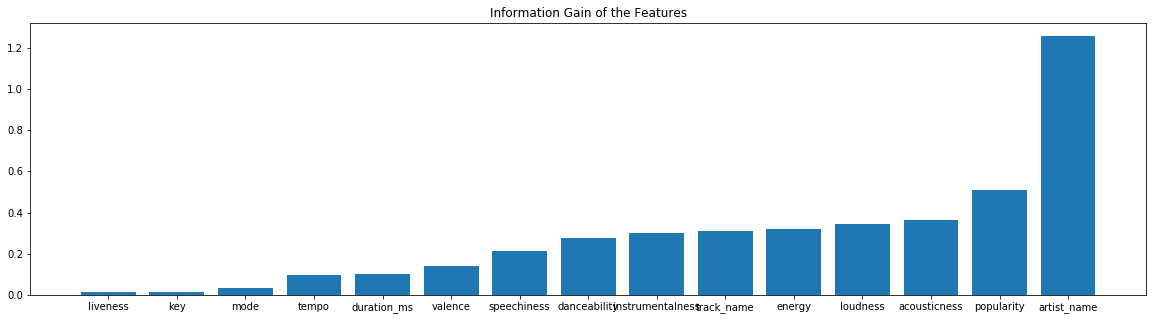

In [118]:
features_information_gain=dict(sorted(features_information_gain.items(), key=lambda x:x[1]))
plt.figure(figsize=(20,5))
plt.bar(features_information_gain.keys(),features_information_gain.values())
plt.title('Information Gain of the Features')
plt.show()

As can be seen, key, mode, and liveness have the most negligible information gain among the features. So, keeping these features does not help the model predict the genre better enough. Moreover, maintaining these features makes the model more complicated and increases the training and testing time and memory usage.

## Phase 2

In [119]:
del data_normal['key']
del data_normal['mode']
del data_normal['liveness']


In [120]:
data_normal

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,music_genre
0,531,3793,0.444444,0.006234,0.710050,0.085058,0.621944,0.029879,0.818736,0.017307,0.582310,0.616244,3
1,1511,4373,0.343434,0.348393,0.729671,0.027735,0.515648,0.006962,0.762565,0.176010,0.246627,0.291371,3
2,582,23551,0.515152,0.018171,0.664269,0.072621,0.886684,0.885312,0.825949,0.016872,0.449965,0.645685,3
3,3210,506,0.393939,0.921687,0.462612,0.067053,0.068700,0.000070,0.651071,0.013388,0.261428,0.209137,3
4,2874,17538,0.363636,0.034637,0.450621,0.102945,0.824510,0.448692,0.835352,0.044302,0.380287,0.388832,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4924,5236,0.222222,0.914659,0.290386,0.111050,0.132578,0.000000,0.548752,0.036356,0.312151,0.209137,1
29996,3176,20134,0.262626,0.968875,0.072378,0.156829,0.203777,0.874245,0.631810,0.018722,0.259968,0.039289,1
29997,1662,2498,0.545455,0.979920,0.330717,0.077561,0.114528,0.000000,0.614223,0.050724,0.449965,0.234518,1
29998,1330,15500,0.424242,0.988956,0.069108,0.076751,0.016654,0.911469,0.483074,0.020137,0.201953,0.035736,1


In [122]:
x_data=data_normal.copy()
del x_data['music_genre']
y_data=data_normal['music_genre']


## Train and Test Data Split

We choose the split size of the train and test data to 20% to ensure enough data is available for both training and testing the model. It is better to randomly select the test data from the whole dataset to ensure that the distribution of the test and train data are close to each other. The testing accuracy is a good metric for the performance of the model.

Some classification problems can exhibit a significant imbalance in the distribution of the target classes: for instance, there could be several times more negative samples than positive samples. In such cases, it is recommended to use stratified sampling to ensure that relative class frequencies are approximately preserved in each train and validation fold.


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,stratify=y_data,test_size=0.2)

## K-Nearest-Neighbors

In statistics, the K-Nearest-Neighbors algorithm (KNN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951 and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in the dataset. The output depends on whether kNN is used for classification or regression.


In [ ]:
test_acc={}
train_acc={}
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_train=knn.predict(x_train)
    train_acc[i]=metrics.accuracy_score(y_train,y_pred_train)
    y_pred_test=knn.predict(x_test)
    test_acc[i]=metrics.accuracy_score(y_test,y_pred_test)
    print('KNN',i,'train accuracy:',train_acc[i],'test accuracy:',test_acc[i])


In [137]:
for i in range(len(test_acc)):
    print('KNN',i+1,'train accuracy:',train_acc[i+1],'test accuracy:',test_acc[i+1])

KNN 1 train accuracy: 0.9939045781441852 test accuracy: 0.32813048053314625
KNN 2 train accuracy: 0.65712155762147 test accuracy: 0.3104173974044195
KNN 3 train accuracy: 0.5856867216277846 test accuracy: 0.31164503682918276
KNN 4 train accuracy: 0.5539817575863883 test accuracy: 0.31234654507190457
KNN 5 train accuracy: 0.5260042097877565 test accuracy: 0.3137495615573483
KNN 6 train accuracy: 0.49671110331520785 test accuracy: 0.3149772009821115
KNN 7 train accuracy: 0.4793018768637081 test accuracy: 0.31304805331462643
KNN 8 train accuracy: 0.46395369233467815 test accuracy: 0.31462644686075064
KNN 9 train accuracy: 0.45294685142957375 test accuracy: 0.312872676253946
KNN 10 train accuracy: 0.44575513067882827 test accuracy: 0.30918975797965625
KNN 11 train accuracy: 0.4375986669005438 test accuracy: 0.3097158891616977
KNN 12 train accuracy: 0.4289159796526925 test accuracy: 0.3104173974044195
KNN 13 train accuracy: 0.42071566391861076 test accuracy: 0.3074359873728516
KNN 14 train 

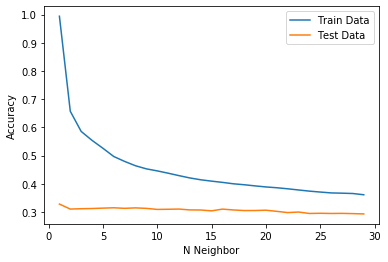

In [135]:
plt.plot(list(train_acc.keys()),list(train_acc.values()),label='Train Data')
plt.plot(list(test_acc.keys()),list(test_acc.values()),label='Test Data')
plt.legend()
plt.xlabel('N Neighbor')
plt.ylabel('Accuracy')
plt.show()


As it can be seen, the model does not have good accuracy on the test data, and its accuracy is approximately constant over the different number of neighbors. Hence, the model is overfitted on the training data, and also, we can conclude that the selected features are not good enough to predict the genre of the music in this model.

## Desicion Tree

In [138]:
max_depth_list=[i for i in range(1,20)]
min_samples_leaf_list=[i for i in range(1,20)]
test_acc=[]
train_acc=[]

for max_depth in max_depth_list:
    for min_samples_leaf in min_samples_leaf_list:
        clf=DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
        clf=clf.fit(x_train,y_train)
        y_pred_train=clf.predict(x_train)
        train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
        y_pred_test=clf.predict(x_test)
        test_acc.append(metrics.accuracy_score(y_test,y_pred_test))
        print('Decision Tree: max depth:',max_depth,',min sample leaf:',min_samples_leaf,'train accuracy:',train_acc[-1],'test accuracy:',test_acc[-1])



Decision Tree: max depth: 1 ,min sample leaf: 1 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 2 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 3 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 4 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 5 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 6 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 7 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 8 train accuracy: 0.29736011226100684 test accuracy: 0.29743949491406524
Decision Tree: max depth: 1 ,min sample leaf: 9 

In [150]:
def prepare_XYZ(X,Y,Z):
    X=np.array(X)
    Y=np.array(Y)
    Z=np.array(Z).reshape(X.shape[0],Y.shape[0])
    X,Y=np.meshgrid(X,Y)
    return X,Y,Z
    

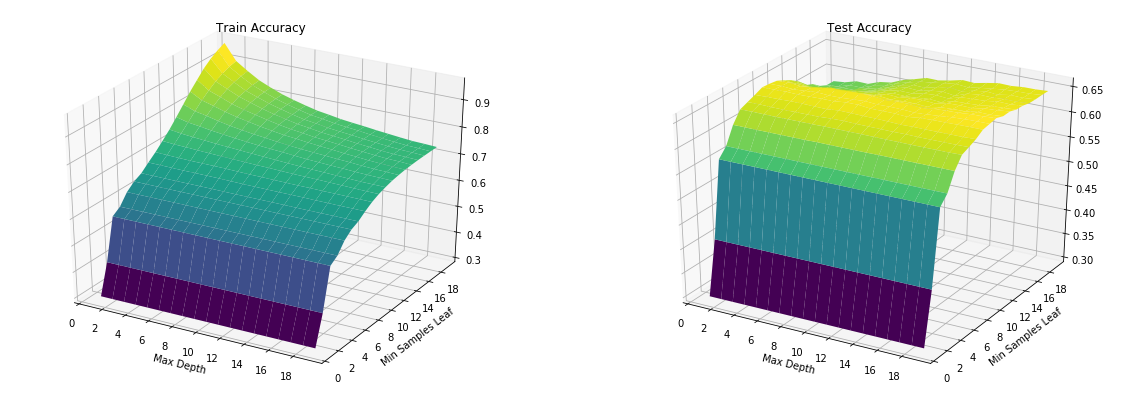

In [182]:
fig=plt.figure(figsize=(20,7))
ax=fig.add_subplot(121, projection='3d')

X,Y,Z=prepare_XYZ(max_depth_list,min_samples_leaf_list,train_acc)

ax.plot_surface(X,Y,Z,cmap='viridis',edgecolor='none')
ax.set_xticks(range(0,X.shape[0],2))
ax.set_yticks(range(0,X.shape[1],2))
plt.xlabel('Max Depth')
plt.ylabel('Min Samples Leaf')
plt.title('Train Accuracy')

ax2=fig.add_subplot(122, projection='3d')

X,Y,Z=prepare_XYZ(max_depth_list,min_samples_leaf_list,test_acc)

ax2.plot_surface(X,Y,Z,cmap='viridis',edgecolor='none')
ax2.set_xticks(range(0,X.shape[0],2))
ax2.set_yticks(range(0,X.shape[1],2))
plt.xlabel('Max Depth')
plt.ylabel('Min Samples Leaf')
plt.title('Test Accuracy')

plt.show()


The model's accuracy for max depth of 1 and min samples leaf of 19 is good on training data and is not good enough on the test data. Hence we can conclude that the model is overfitted on the train data. On the other hand, for min samples leaf of 1, the model does not have good accuracy on both training and test data, and the model is underfitting.

### Accuracy

Accuracy measures how often your model "gets it right" compared to the total number of predictions. The total fraction of predictions matches the actual values in terms of metrics.

Accuracy can be calculated as the number of true positives + the number of true negatives divided by the total number of predictions made.

![Accuracy](./img/Accuracy.png)

Knowing how to measure accuracy is just as important as knowing when to use accuracy as a metric. In many cases, it's not inappropriate, but what if I were predicting whether or not there would be a tsunami in Seattle on any given day? I would predict "no" every day and be right over 99% of the time. However, that would be a completely useless model.

Accuracy is an excellent metric to use if you look at a sample set with closely balanced classes. If you have highly unbalanced classes, using accuracy as a metric would encourage the model to learn the most available class. A concrete example would be a neural network that predicts the MNIST digits dataset.

### Precision

Precision and accuracy are two terms that are often mixed up in everyday speech. In regular speech, accuracy refers to how close your prediction is to the actual truth, and precision refers to how close your predictions are to each other. We measure precision based on the total number of positive predictions in machine learning metrics.

![Precision](./img/Precision.png)

Unlike measuring your dart throwing precision, we're not going to ask the machine to make the exact prediction multiple times. We will measure using the metrics we have in our confusion matrix. A machine learning model's prediction is the number of true positives divided by the number of positive predictions.

The main strength of precision as a metric is to measure how confident we are in the correctness of our prediction. If we need to be highly confident in our true value, then we should prioritize precision as a metric. A real-life example of this would be a model that predicts how safe a submarine would be in deep-sea conditions. If we used recall as a metric with the confusion matrix we have, we would have to continue tweaking our model. 80% is a pretty abysmal recall score.

The recall is an excellent metric to use when we are most concerned with getting as many true positive values as possible. A real-life example would be a machine learning model to capture early-stage cancer from medical images. We want to be as sure as possible that our sailors will return alive.

### Recall

While accuracy and precision are two commonly used words that have slightly altered meanings when applied to machine learning model metrics, recall isn't as commonly used as a measuring term. Usually, we hear recall in terms of cars or other products in the market being recalled.

The name "recall" suggests that we measure how well our model "remembers" something. In this case, that something is the actual number of positive values. As a machine learning metric, recall is measured as the total number of true positives divided by the total number of actual positive values. 

![Recall](./img/Recall.png)

If we were using recall as a metric with the confusion matrix we have, we would have to continue tweaking our model. 80% is a pretty abysmal recall score.

The recall is an excellent metric to use when we are most concerned with getting as many true positive values as possible. A real-life example would be a machine learning model to capture early-stage cancer from medical images.

### F Score

Unlike accuracy, precision, or recall, F-Score (also called F1-Score) doesn't lend itself to any hints about how to calculate it or what it may represent.

The F-Score is the harmonic mean of precision and recall. The harmonic mean of two numbers strikes a balance between them. We calculate the harmonic mean of a and b as 2*a*b/(a+b).

Plugging precision and recall into the formula above results in 2 * precision * recall / (precision + recall). When we turn this into the stats we have in the confusion matrix, and we need to use all of the numbers except for true negatives. This harmonic mean simplifies to 2 * the number of true positives/(2 * the number of true positives + the number of false negatives + the number of false positives).

We know that F-Score is a balance of precision and recall from the formula. We use the F Score in cases where we need good precision and good recall. This points to using F Score when we are concerned with getting the highest number of true positives, and we want to be as sure as possible that our prediction is correct. 

### Summary

Accuracy is best used when we want the most number of predictions that match the actual values across balanced classes. Precision is best used when we want to be as sure as possible that our predictions are correct. The recall is best used when we want to maximize how often we correctly predict positives. Finally, F-Score is a combination of precision and recall. It is used when we want to be as sure as possible about our predictions while maximizing the number of correctly predicted positives ([Source](https://pythonalgos.com/accuracy-precision-recall-and-f-score/)).

## Metrics

### KNN

In [184]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
print(metrics.classification_report(y_test,y_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.199     0.353     0.255       946
           1      0.548     0.699     0.614       947
           2      0.271     0.361     0.310       956
           3      0.256     0.214     0.233       954
           4      0.319     0.186     0.235       947
           5      0.251     0.051     0.085       952

    accuracy                          0.310      5702
   macro avg      0.307     0.311     0.289      5702
weighted avg      0.307     0.310     0.288      5702



In [191]:
model=DecisionTreeClassifier(max_depth=8,min_samples_leaf=4)
model=model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
print('Decision Tree:')
print(metrics.classification_report(y_test,y_pred_test,digits=3))

Decision Tree:
              precision    recall  f1-score   support

           0      0.549     0.366     0.439       946
           1      0.875     0.881     0.878       947
           2      0.612     0.516     0.560       956
           3      0.666     0.596     0.629       954
           4      0.707     0.746     0.726       947
           5      0.498     0.765     0.603       952

    accuracy                          0.645      5702
   macro avg      0.651     0.645     0.639      5702
weighted avg      0.651     0.645     0.639      5702

